# Self-Balancing Scooter Control

![](images/self-balancing-scooter.png)

> A self-balancing scooter [...] is a self-balancing personal transporter consisting of two motorized wheels connected to a pair of articulated pads on which the rider places their feet. The rider controls the speed by leaning forward or backward, and direction of travel by twisting the pads.
>
> Source: <https://en.wikipedia.org/wiki/Self-balancing_scooter>

### Python Dependencies

In [37]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *
from matplotlib.patches import Polygon,Circle

Step 1 - Scooter Planar Model
================================

### Introduction

We consider a simple model of a self-balancing scooter evolving in the plane. It is mainly made of

  - The frame that contains the two articulated pads; from above, each pad essentially look like a triangle (one vertice in the center of the frame, one vertice at each extremity of the wheel).

  - Two fixed wheels (their orientation with respect to the frame does not change).
    They are parallel and located at opposite ends of the frame.
    
Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the scooter faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the scooter moves forward.

### Parameter Definition

From now on, we assume that the seat frame length is $\ell = 50 \mbox{ cm}$ and the wheel radius is $r = 12.5 \mbox{ cm}$.

🧩 Define the corresponding Python variables `l` and `r` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values.

In [38]:
l=0.5
r=0.125

### Graphical Representation

🧩 Implement a function `draw_scooter` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with a red frame and black fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. Use a green circle marker 50 cm in of the frame to indicate which way is forward.

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

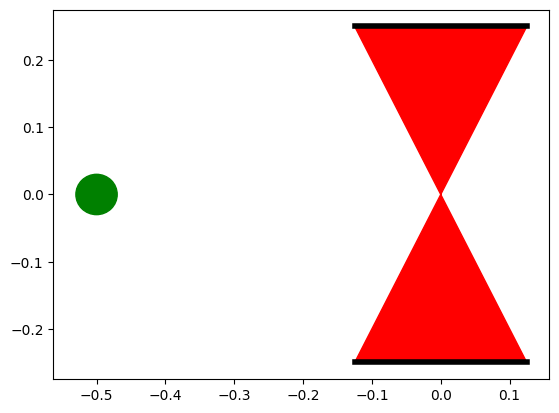

In [39]:
def draw_scooter(x, y, theta):
    #Coordonates of the center of the right wheel
    x1 = x + sin(theta)*l/2
    y1 = y - cos(theta)*l/2

    #Coordonates of the center of the left wheel
    x2 = x - sin(theta)*l/2
    y2 = y + cos(theta)*l/2

    #roue droite
    x1_ = linspace(x1-cos(theta)*r,x1+cos(theta)*r, 100)
    y1_ = linspace(y1-sin(theta)*r,y1+sin(theta)*r, 100)

    plot(x1_, y1_, '-', linewidth=4,color='black')

    #roue gauche
    x2_ = linspace(x2-cos(theta)*r,x2+cos(theta)*r, 100)
    y2_ = linspace(y2-sin(theta)*r,y2+sin(theta)*r, 100)

    plot(x2_, y2_, '-',linewidth=4,color='black')

    #Draw the scooter
    frame_points=[[x1-cos(theta)*r,y1-sin(theta)*r],[x1+cos(theta)*r,y1+sin(theta)*r],[x2-cos(theta)*r,y2-sin(theta)*r],[x2+cos(theta)*r,y2+sin(theta)*r]]
    polygon = Polygon(frame_points,closed=True, edgecolor='red', fill=True, facecolor='red')
    gca().add_patch(polygon)

    # Draw the direction marker as a circle
    forward_marker = [x + 0.5 * np.cos(theta), y + 0.5 * np.sin(theta)]
    gca().add_patch(Circle(forward_marker, 0.03, color='green'))




# Test the function
draw_scooter(0, 0,pi)

🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [40]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

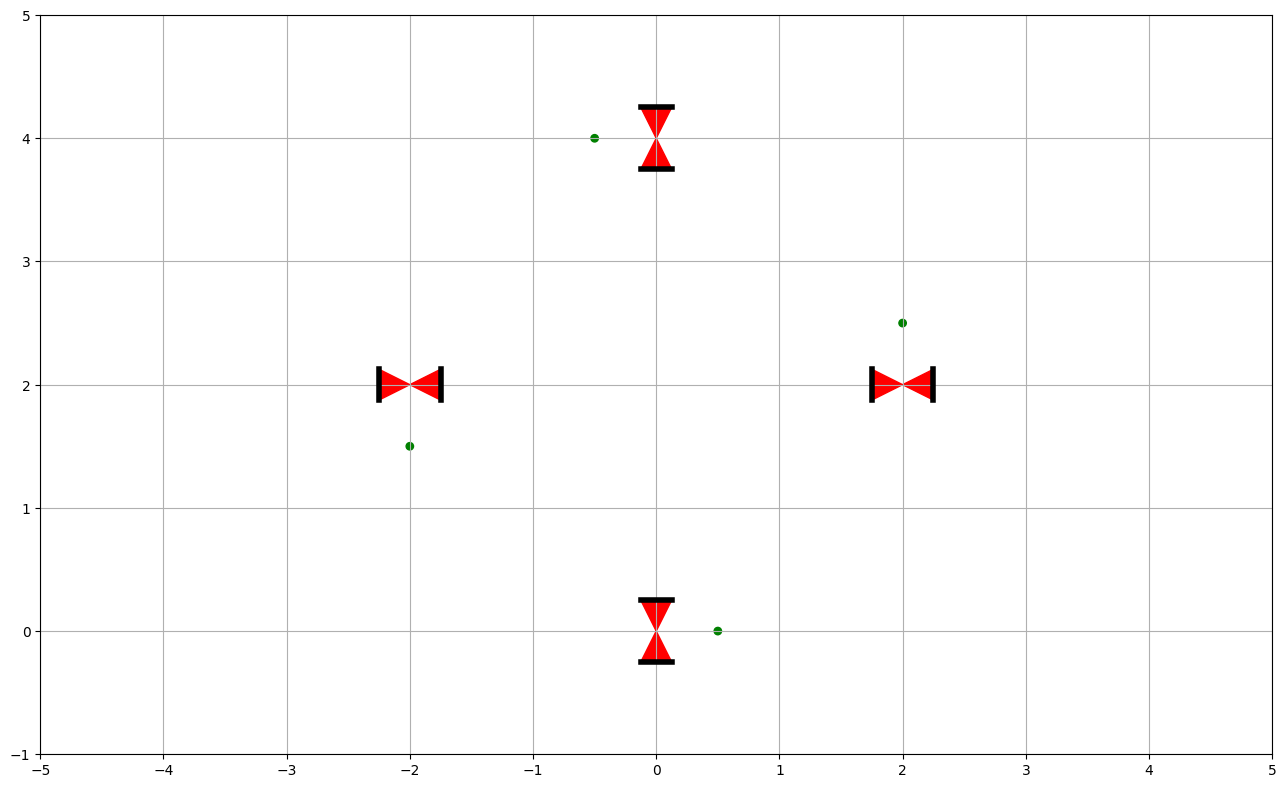

In [41]:
draw_arena(-5,5,-1,5)
draw_scooter(0,0,0)
draw_scooter(2,2,pi/2)
draw_scooter(0,4,pi)
draw_scooter(-2,2,3*pi/2)

### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping.

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**TODO**

Les vitesses linéaires des roues sont données par :

$V_{l} = r * 𝜔_{l}$

$V_{r} = r * 𝜔_{r}$

où $V_{l}$ et $V_{r}$ sont les vitesses linéaires des roues gauche et droite, respectivement.

La vitesse 𝑉 du scooter est donnée par :

V = ($V_{l} + V_{r}$) / 2

𝑉 est liée aux vitesses angulaires des roues par :

V = $\frac{r}{2}(\omega_{l} + \omega_{r})$

On connait deja les vitesses, $V_x$ et $V_y$ :

$V_x = \dot{x} = V \cdot \cos(\theta)$

$V_y = \dot{y} = V \cdot \sin(\theta)$.

Il nous reste que trouver $\dot{θ}$ :


Soit $d$ la distance entre le centre de rotation $A$ et le centre du scooter, donc

\begin{equation}
    \dot{\theta} = -\frac{V_r}{d - \frac{l}{2}}
\end{equation}

\begin{equation}
    \dot{\theta} = -\frac{V_l}{d + \frac{l}{2}}
\end{equation}

En résolvant la première équation pour $d$, nous obtenons :

\begin{equation}
    d = \frac{-V_r}{\dot{\theta}} + \frac{l}{2}
\end{equation}

En remplaçant dans la deuxième équation, nous obtenons :

\begin{equation}
    \dot{\theta} = \frac{-V_l}{\frac{-V_r}{\dot{\theta}} + l}
\end{equation}

D'où,

\begin{equation}
    \dot{\theta} = \frac{V_r - V_l}{l}
\end{equation}

Donc, en remplaçant $V_l$ et $V_r$ par leurs expressions, on trouve:
\begin{equation}
\dot{\theta} = \frac{r}{l} \times (\omega_r - \omega_l)
\end{equation}

\begin{equation}
\dot{x} = \frac{r}{2} \cos(\theta) (\omega_r + \omega_l)
\end{equation}

\begin{equation}
\dot{y} = \frac{r}{2} \sin(\theta) (\omega_r + \omega_l)
\end{equation}


### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

Nous savons que $\omega_l$ et $\omega_r$ sont des fonctions continûment différentiables de $x$, $y$ et $\theta$. Ainsi, d'après les équations ci-dessus, $\dot{\theta}$, $\dot{x}$ et $\dot{y}$ sont également des fonctions continûment différentiables de $x$, $y$ et $\theta$ comme somme et produits de fonctions continûment différentiables. Donc, la matrice jacobienne du champ de vecteurs du système est définie et continue. Ainsi, le système est bien posé.


**TODO**

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

Let

$
x = \begin{pmatrix}
x \\
y \\
\theta
\end{pmatrix}
$

**Cas 1:** Si $\omega_l$ et $\omega_r$ sont des constantes

Lorsque $\omega_l$ et $\omega_r$ sont des constantes, nous pouvons poser :

$
\omega_l = \omega_l^0 \quad \text{et} \quad \omega_r = \omega_r^0
$

Les équations différentielles deviennent alors :

$
\begin{cases}
\dot{x} = k \cos \theta \\
\dot{y} = k \sin \theta \\
\dot{\theta} = k_2
\end{cases}
$

où :


$k = \frac{r}{2} (\omega_l^0 + \omega_r^0) \quad \text{et} \quad k_2 = \frac{r}{\ell} (\omega_r^0 - \omega_l^0)$


La solution de $\dot{\theta} = k_2$ est :

$
\theta(t) = \theta_0 + k_2 t
$

où $\theta_0$ est l'angle initial.

En substituant $\theta(t)$ dans les équations pour $\dot{x}$ et $\dot{y}$ :

$
\begin{cases}
\dot{x} = k \cos (\theta_0 + k_2 t) \\
\dot{y} = k \sin (\theta_0 + k_2 t)
\end{cases}
$

Ce sont les équations d'une courbe dans le plan. Puisque $k$ et $k_2$ sont des constantes, les solutions $x(t)$ et $y(t)$ seront bien définies pour tout $t \geq t_0$. Par conséquent, la solution maximale est globale car le mouvement se poursuivra indéfiniment sans aucun changement de comportement ou singularité.


**TODO**

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [42]:
def omega(t, xytheta):
    omega_l = (1 - l/4) * pi / r
    omega_r = (1 + l/4) * pi / r
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [43]:
def fun(t, xytheta):
    x, y, theta = xytheta
    omega_l, omega_r = omega(t, xytheta)
    dx = r * 0.5 * (omega_l + omega_r) * cos(theta)
    dy = r * 0.5 * (omega_l + omega_r) * sin(theta)
    dtheta = r * (omega_r - omega_l) / l
    return array([dx, dy, dtheta])


### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - \ell/4)  \pi / r \mbox{ rad/s}$ and $\omega_r = (1 + \ell/4)  \pi / r \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [54]:
t_span = [0, 4]
xy_theta_0 = [0, 0, 0]
result = solve_ivp(fun = fun, t_span = t_span, y0 = xy_theta_0, dense_output = True)
rt = result["t"]
x = result["y"][0]
y = result["y"][1]
theta = result["y"][2]
sol = result["sol"]

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

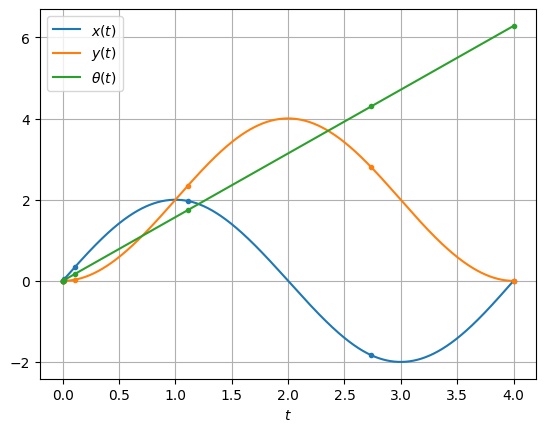

In [52]:
figure()
t = linspace(0, 4, 1500)
plot(t, sol(t)[0], "-", label="$x(t)$")
plot(t, sol(t)[1], "-", label="$y(t)$")
plot(t, sol(t)[2], "-", label="$θ(t)$")
plot(rt, x, ".", color="C0")
plot(rt, y, ".", color="C1")
plot(rt, theta, ".", color="C2")
xlabel("$t$"); grid(); legend()

🧩 Use the simulation results to display the robot location every 0.5 second.

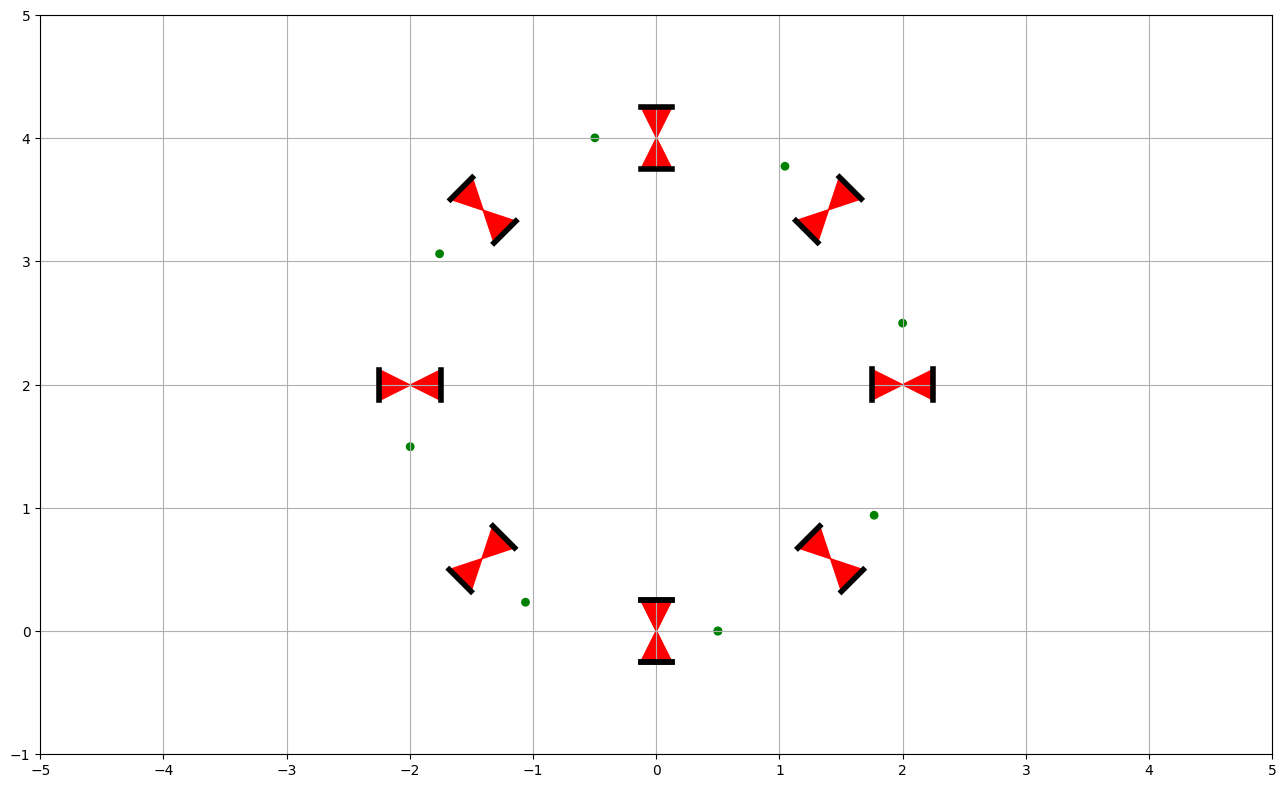

In [53]:
# drawing the world arena
draw_arena(-5, 5, -1, 5)

ts = []
for i in range(9):
  ts.append(i * 0.5)

for t in ts:
    draw_scooter(sol(t)[0],sol(t)[1],sol(t)[2])
show()

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$?

**TODO**

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

In [ ]:
pass

🧩 If needed, adjust the simulation parameters the simulated position error is less than $1\, \mathrm{ mm}$.

In [ ]:
pass